###Codigo e implementación https://github.com/Psychofun/Red-Neuronal-Numpy
Autor: PsyFun
##Preprocesamiento de los datos, para estandarizar ("gre","gpa") e individualizar la caracteristica categorica "rank"

In [ ]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('./binary.csv')
print(admissions.describe())
print(admissions.shape)
print(admissions.head())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
(400, 4)
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


#Conversion de una variable categorica "rank" a variables binarias "rank_1","rank_2","rank_3", "rank_4"

In [ ]:
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
print(data.describe())
data = data.drop('rank', axis=1)
print(data.shape)
print(data.head())

            admit         gre         gpa       rank      rank_1      rank_2  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean     0.317500  587.700000    3.389900    2.48500    0.152500    0.377500   
std      0.466087  115.516536    0.380567    0.94446    0.359955    0.485369   
min      0.000000  220.000000    2.260000    1.00000    0.000000    0.000000   
25%      0.000000  520.000000    3.130000    2.00000    0.000000    0.000000   
50%      0.000000  580.000000    3.395000    2.00000    0.000000    0.000000   
75%      1.000000  660.000000    3.670000    3.00000    0.000000    1.000000   
max      1.000000  800.000000    4.000000    4.00000    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.

Estandarizacion de las variables ("gre","gpa")

In [ ]:
# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
print(data.shape)
print(data.describe())

(400, 7)
            admit           gre           gpa      rank_1      rank_2  \
count  400.000000  4.000000e+02  4.000000e+02  400.000000  400.000000   
mean     0.317500 -3.907985e-16  2.198242e-16    0.152500    0.377500   
std      0.466087  1.000000e+00  1.000000e+00    0.359955    0.485369   
min      0.000000 -3.183094e+00 -2.968993e+00    0.000000    0.000000   
25%      0.000000 -5.860633e-01 -6.829288e-01    0.000000    0.000000   
50%      0.000000 -6.665712e-02  1.340106e-02    0.000000    0.000000   
75%      1.000000  6.258844e-01  7.360075e-01    0.000000    1.000000   
max      1.000000  1.837832e+00  1.603135e+00    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000  


dividir el conjunto de datos para entrenamiento y evaluación del modelo

In [ ]:
print(data.index)

RangeIndex(start=0, stop=400, step=1)


In [ ]:
# Split off random 10% of the data for testing
np.random.seed(21)
# Obtiene 360 registros random para entrenar el modelo
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
"""print(sample)"""
train_data, test_data = data.iloc[sample], data.drop(sample)
print(train_data.shape)
print(test_data.shape)

(360, 7)
(40, 7)


División de los datos en caracteristicas y etiquetas

In [ ]:
features, targets = train_data.drop('admit', axis=1), train_data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [ ]:
len([(x,y) for x,y in (zip(features.values,targets))])
print

<function print>

Función de Activación

In [ ]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [ ]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida
epochs = 1000 # Número de iteraciones sobre el conjunto de entrenamiento
alpha = 0.01 # Taza de aprendizaje

ult_costo = None 

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos 

# Inicialización de los pesos

entrada_escondida = np.random.normal(scale = 1/k**0.5, size = (k,n_hidden))
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)


# Entrenamiento
for e in range(epochs):
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):
        # Pasada hacia adelande (forward pass) or forward propagation
          # Entrada --> capa 1
        z = sigmoide(np.matmul(x, entrada_escondida))
          # Capa 1 --> salida
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción 
  
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_) # --> derivada de la funcion sigmoide
        # cambia los pesos de la capa oculta o escondida según el delta hallado (salida error)
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)

        gradiente_entrada_escondida += escondida_error * x[:,None]
        gradiente_escondida_salida += salida_error * z 
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m 
    escondida_salida +=  alpha * gradiente_escondida_salida / m 

    if e % (epochs / 10 ) == 0: # Cada 100 iteraciones se actualiza
        z = sigmoide(np.dot(features.values, entrada_escondida))
        y_ = sigmoide(np.dot(z, escondida_salida))
        # Función de costo
        costo = np.mean(( y_ - targets)**2 )
        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")
        else:
            print("Costo de entrenamiento: ", costo )
        ult_costo = costo 

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida))
y_ = sigmoide(np.dot(z, escondida_salida))

predicciones =  y_ > 0.5 
precision = np.mean(predicciones == targets_test)
print("Precisión: {:.3f}".format(precision))




Costo de entrenamiento:  0.22749585224305116
Costo de entrenamiento:  0.2269025619637309
Costo de entrenamiento:  0.22633680141776774
Costo de entrenamiento:  0.22579695855377327
Costo de entrenamiento:  0.22528152075551738
Costo de entrenamiento:  0.22478906897245235
Costo de entrenamiento:  0.22431827212743183
Costo de entrenamiento:  0.2238678818008567
Costo de entrenamiento:  0.22343672718793942
Costo de entrenamiento:  0.2230237103237552
Precisión: 0.650


# **SOLUCIÓN LABORATORIO**

## **Punto 1**
Hacer un análisis específico de complejidad en tiempo Big O() del algoritmo de entrenamiento de redes neuronales gradiente descendente, diga sobre esta complejidad, **¿cuál de los parámetros de la red neuronal afecta en mayor medida el consumo de tiempo?**



```
# Hyperparameters
n_hidden = 2 # ---------------------------------------                                    O(1)
epochs = 10 # ----------------------------------------                                    O(1)
alpha = 0.01 # ---------------------------------------                                    O(1)

ult_costo = None # -----------------------------------                                    O(1)

m,k = features.shape # -------------------------------                                    O(1)

# Inicialización de los pesos

entrada_escondida = np.random.normal(scale = 1/k**0.5, size = (k,n_hidden)) # --------    O(1)
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden) # --------------    O(1)

# Entrenamiento
for e in range(epochs): # ---------------------------------------                         O(e)
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape) # -----------------   O(1)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape) # ------------------   O(1)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets): # -----------------------                    O(90%-d)
        # Pasada hacia adelande (forward pass) or forward propagation
          # Entrada --> capa 1
        z = sigmoide(np.matmul(x, entrada_escondida)) # --------------                    O(k^2.8)
          # Capa 1 --> salida
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción # --------------------   O(n_hidden^2.8)
  
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_) # ---------------------------------------   O(1)
        
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z) # -------   O(n_hidden) --> Complejidad np.dot() = O(n)

        gradiente_entrada_escondida += escondida_error * x[:,None] # ------------------   O(1)
        gradiente_escondida_salida += salida_error * z # ------------------------------   O(1)
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m # --------------------   O(1)
    escondida_salida +=  alpha * gradiente_escondida_salida / m # ---------------------   O(1)

    if e % (epochs / 10 ) == 0: 
        z = sigmoide(np.dot(features.values, entrada_escondida)) # --------------------   O(k)
        y_ = sigmoide(np.dot(z, escondida_salida)) # ----------------------------------   O(n_hidden)

        # Función de costo
        costo = np.mean(( y_ - targets)**2 ) # ----------------------------------------   O(1)

        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, 
                  " ADVERTENCIA -  Costo subiendo") # ----------------------------------  O(1)
        else:
            print("Costo de entrenamiento: ", costo ) # --------------------------------  O(1)
        
        ult_costo = costo # ---------------------------------------                       O(1)

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida)) # ---------------------------      O(k)
y_ = sigmoide(np.dot(z, escondida_salida)) # ---------------------------------------      O(n_hidden)

predicciones =  y_ > 0.5 # ---------------------------------------                        O(1)
precision = np.mean(predicciones == targets_test) # --------------                        O(1)
print("Precisión: {:.3f}".format(precision)) # -------------------                        O(1)


```

Así, la complejidad estaría dada por:
```
Big O = 7*O(1) + O(e)[2*O(1) + O(90%-d)[O(k^2.8) + 2*O(n_hidden^2.8) + 3*O(1)] + 2*O(1) + O(k) + O(n_hidden) + 4*O(1)] + O(k) + O(n_hidden) + 4*O(1)
      = O(e)*O(90%-d)[O(k^2.8) + *O(n_hidden^2.8)] + O(e)*(O(k) + O(n_hidden)) + O(k) + O(n_hidden)
```
Donde:

      *e          = Épocas
      *90%-d      = Datos de entrenamiento 
      *k          = Número de dimensiones en los datos 
      *n_hidden   = Número de unidades en la capa escondida

Y el parámetro que más afecta el tiempo de ejecución del algoritmo es la cantidad de datos de entrenamiento, junto con la cantidad de épocas

## **Punto 2**
Construir un experimento, que le permita encontrar la cantidad de épocas suficientes, para entrenar esta red neuronal con los mismos datos.

### **Solución**
El experimento consistió en realizar 20 iteraciones variando las épocas de 10 en 10, donde se observó una gráfica en la cual el comportamiento de la precisión variaba en las primeras iteraciones, es decir, en las épocas iniciales, y entre más aumentaba el número de épocas, la función se normalizaba y mostraba una tendencia marcada hacia una precisión de 0.650. Cabe resaltar que los comportamientos del entrenamiento variaban cada vez que se ejecutaba, pero en cada ejecución la función terminaba convergiendo al valor dicho anteriormente.

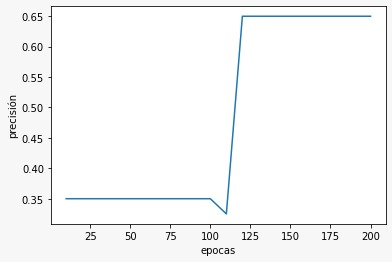

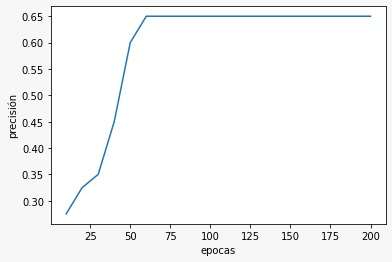

El código se modificó de la siguiente manera para obtener los valores presentados en las gráficas:



```
...
# Inicialización de los pesos
entrada_escondidainit = np.random.normal(scale = 1/k**0.5, size = (k,n_hidden))
escondida_salidainit = np.random.normal(scale = 1/k**0.5,size = n_hidden) 

# Entrenamiento
for i in range (20):
  entrada_escondida = entrada_escondidainit
  escondida_salida = escondida_salidainit
  lista_epocas.append(epochs)
  epochs+=10
  
  for e in range(epochs): 
  ...
```



## **Punto 3**

Evalúe y compare la función de activación tanh(), para las neuronas de la capa oculta y cambie por ende su derivada en el cálculo de las variaciones de dW.
¿Cuál es el efecto del cambio en el rendimiento de la red neuronal?

In [ ]:
def tanh(x):
  return np.tanh(x)

In [ ]:
# Hyperparameters
n_hidden = 2 
epochs = 1000 
alpha = 0.01 

ult_costo = None 

m,k = features.shape 

# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5, size = (k,n_hidden))
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)

# Entrenamiento
for e in range(epochs):
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)

    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):
        # Pasada hacia adelande (forward pass) or forward propagation

        z = tanh(np.matmul(x, entrada_escondida))
        y_ = tanh(np.matmul(escondida_salida,z)) # predicción 
  
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * (1/np.cosh(y_))**2 # --> cambio en la derivada de la funcion de activación
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)

        gradiente_entrada_escondida += escondida_error * x[:,None]
        gradiente_escondida_salida += salida_error * z 

    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m 
    escondida_salida +=  alpha * gradiente_escondida_salida / m 

    if e % (epochs / 10 ) == 0: 
        z = tanh(np.dot(features.values, entrada_escondida))
        y_ = tanh(np.dot(z, escondida_salida))
        
        # Función de costo
        costo = np.mean(( y_ - targets)**2 )
        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")
        else:
            print("Costo de entrenamiento: ", costo )
        ult_costo = costo 

#  Precisión en los datos de prueba 
z = tanh(np.dot(features_test, entrada_escondida))
y_ = tanh(np.dot(z, escondida_salida))

predicciones =  y_ > 0.5 
precision = np.mean(predicciones == targets_test)
print("Precisión: {:.3f}".format(precision))


Costo de entrenamiento:  0.3594044792626053
Costo de entrenamiento:  0.3416545317829924
Costo de entrenamiento:  0.3310996505767618
Costo de entrenamiento:  0.3246847015960315
Costo de entrenamiento:  0.3205891464064138
Costo de entrenamiento:  0.31779094159928606
Costo de entrenamiento:  0.31572536867753026
Costo de entrenamiento:  0.31407945523367264
Costo de entrenamiento:  0.3126780705001669
Costo de entrenamiento:  0.31142223805277425
Precisión: 0.650


### **Respuesta:**
Al cambiar la función de activación, el costo de entrenamiento de *tanh* fue mayor a comparación con la sigmoide, pero la precisión, para el número de épocas estipulado, fue el mismo.

Debido a la naturaleza de la función tanh, la media de los valores de salida (y_) aumenta, y por ende, la diferencia entre esta y los valores esperados también lo hace, incrementándose así el costo.


